# 多层感知机

In [1]:
import torch
import torch.autograd
import matplotlib.pyplot as plt
import numpy as np
import dataset.fashion_mnist.utils.mnist_reader as mnist_reader
import tqdm

In [2]:
x_train, y_train = mnist_reader.load_mnist('dataset/fashion_mnist/data/fashion', kind='train')
x_test, y_test = mnist_reader.load_mnist('dataset/fashion_mnist/data/fashion', kind='t10k')

In [3]:
x_train = x_train.astype("float")
x_test = x_test.astype("float")
y_train = y_train.astype("float")
y_test = y_test.astype("float")

In [4]:
def get_fashion_mnist_labels(true_labels, yhat_labels = []):  #@save
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    if(len(yhat_labels) > 0):
        labels = []
        for i in range(true_labels.size()[0]):
            labels.append("true: " + text_labels[true_labels[i].int()] + " predict: " + text_labels[yhat_labels[i]])
    else:
        labels = [text_labels[int(i)] for i in true_labels]
    return labels

In [5]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=2):  #@save
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img.reshape(28, 28))
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

array([<Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'dress'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'pullover'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'pullover'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'trouser'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'shirt'}>,
       <Axes: title={'center': 'coat'}>,
       <Axes: title={'center': 'dress'}>,
       <Axes: title={'center': 'trouser'}>,
       <Axes: title={'center': 'coat'}>, <Axes: title={'center': 'bag'}>,
       

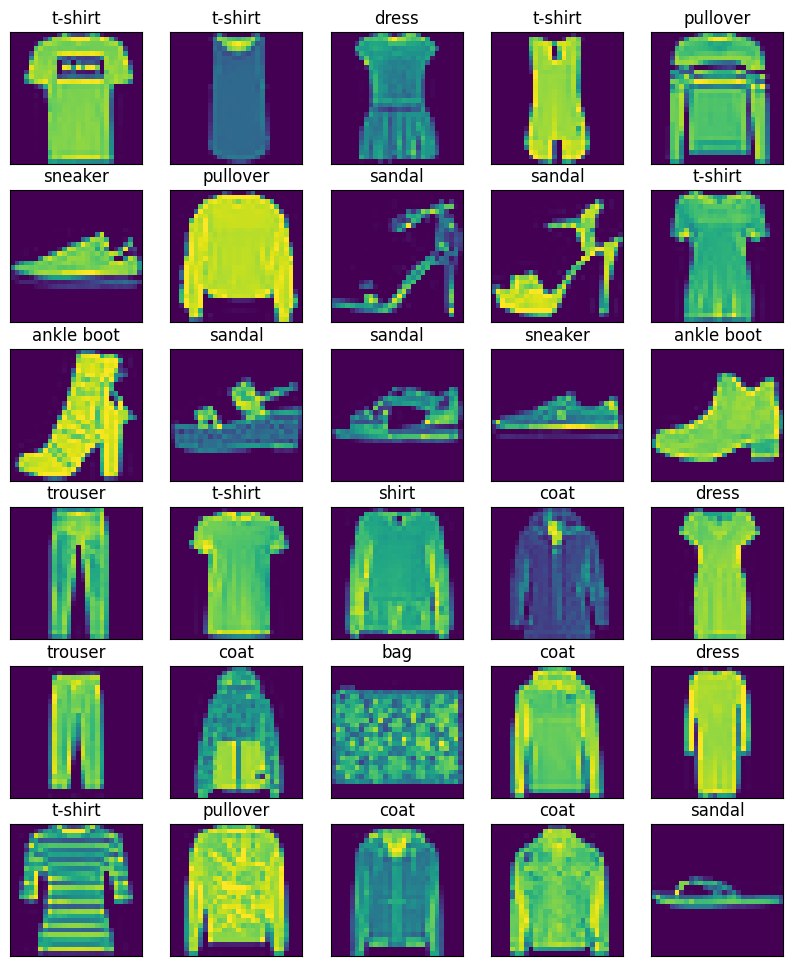

In [6]:
show_images(x_train[1:31], 6, 5, titles=get_fashion_mnist_labels(y_train[1:31]))

In [7]:
num_inputs = 28 * 28
num_outputs = 10
num_hiden = 256
w1 = np.random.uniform(0, 0.001, size = (num_hiden, num_inputs))
b1 = np.random.uniform(0, 0.001, size = (num_hiden))
w2 = np.random.uniform(0, 0.001, size = (num_outputs, num_hiden))
b2 = np.random.uniform(0, 0.001, size = (num_outputs))

In [8]:
x_train = torch.tensor(x_train, requires_grad=True)
y_train = torch.tensor(y_train, requires_grad=True)
x_test = torch.tensor(x_test, requires_grad=True)
y_test = torch.tensor(y_test, requires_grad=True)
w1 = torch.tensor(w1, requires_grad=True)
b1 = torch.tensor(b1, requires_grad=True)
w2 = torch.tensor(w2, requires_grad=True)
b2 = torch.tensor(b2, requires_grad=True)

In [9]:
def hiden(x, w, b):
    return torch.relu(torch.mm(w, x.T) + b.view(-1, 1))

In [10]:
def output(x, w, b):
    return torch.mm(w, x) + b.view(-1, 1)

In [11]:
def softmax(x):
    x_exp = torch.exp(x)
    partition = x_exp.sum(dim=0, keepdim=True)
    return x_exp / partition

In [12]:
def net(x, w1, b1, w2, b2):
    return softmax(output(hiden(x, w1, b1), w2, b2))

In [13]:
def J(yhat, ytrue):
    return - ytrue * torch.log(yhat)

In [14]:
yhat = net(x_train, w1, b1, w2, b2)

In [15]:
print(yhat)

tensor([[0.1108, 0.1111, 0.1041,  ..., 0.1087, 0.1045, 0.1027],
        [0.0708, 0.0685, 0.0881,  ..., 0.0757, 0.0863, 0.0929],
        [0.1050, 0.1058, 0.1020,  ..., 0.1042, 0.1025, 0.1013],
        ...,
        [0.1149, 0.1163, 0.1057,  ..., 0.1126, 0.1068, 0.1031],
        [0.1071, 0.1076, 0.1028,  ..., 0.1057, 0.1033, 0.1018],
        [0.0899, 0.0886, 0.0962,  ..., 0.0919, 0.0956, 0.0978]],
       dtype=torch.float64, grad_fn=<DivBackward0>)


In [16]:
y_train = torch.nn.functional.one_hot(y_train.to(torch.int64)) 

In [17]:
print(y_train.shape)
print(yhat.shape)
print(y_train)

torch.Size([60000, 10])
torch.Size([10, 60000])
tensor([[0, 0, 0,  ..., 0, 0, 1],
        [1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])


In [18]:
lr = 5.4
n = x_train.size()[0]
for i in tqdm.tqdm(range(0, 200)):
    yhat = net(x_train, w1, b1, w2, b2)
    loss = J(yhat.T, y_train).sum() / n
    loss.backward()
    w1.data = w1.data - lr * w1.grad.data / n
    b1.data = b1.data - lr * b1.grad.data / n
    w2.data = w2.data - lr * w2.grad.data / n
    b2.data = b2.data - lr * b2.grad.data / n

  4%|▎         | 7/200 [00:07<03:27,  1.08s/it]


KeyboardInterrupt: 

In [ ]:
print(w1)
print(b1)
print(w2)
print(b2)

tensor([[ 7.8320e-04,  8.6528e-04,  9.0401e-04,  ...,  5.3657e-04,
          3.7810e-04,  2.4528e-04],
        [ 1.6830e-04,  2.4396e-05,  2.2998e-05,  ...,  6.8114e-04,
          8.1678e-04,  5.6949e-04],
        [ 6.4708e-04,  3.9761e-04,  2.4894e-04,  ...,  4.8711e-04,
          4.7885e-04,  2.0183e-04],
        ...,
        [ 9.5386e-04,  7.6658e-04,  1.0360e-03,  ...,  3.7310e-03,
          1.7921e-03,  4.8721e-04],
        [ 8.8296e-04,  9.9653e-04, -7.4191e-06,  ...,  7.6798e-04,
          7.0073e-04,  8.1222e-04],
        [ 9.1116e-04,  1.6519e-04,  9.1229e-04,  ...,  5.4362e-04,
          3.7752e-04,  9.5289e-04]], dtype=torch.float64, requires_grad=True)
tensor([ 5.0263e-04,  4.7332e-04,  8.8210e-04,  6.6099e-04,  3.4128e-04,
        -7.0820e-06,  8.7282e-04,  1.4226e-04, -1.5039e-05,  3.4429e-04,
         3.2054e-04,  5.1893e-04,  5.3207e-04,  6.3594e-04,  7.3988e-04,
         6.2097e-04,  8.2640e-04,  6.0171e-04,  5.2170e-04,  6.5504e-04,
         3.1410e-04,  1.7587e-04,  

In [ ]:
yhat = net(x_test, w1, b1, w2, b2)
print(yhat.max(dim=0))

torch.return_types.max(
values=tensor([0.9839, 0.9379, 1.0000,  ..., 0.9897, 1.0000, 0.9379],
       dtype=torch.float64, grad_fn=<MaxBackward0>),
indices=tensor([9, 2, 1,  ..., 8, 1, 5]))


In [ ]:
yhat = yhat.argmax(dim=0)

In [ ]:
right_num = 0
n = y_test.size()[0]

for i in tqdm.tqdm(range(0, n)):
    if y_test[i] == yhat[i]:
        right_num = right_num + 1
print("准确率：%f %%" % ((right_num / n) * 100))

100%|██████████| 10000/10000 [00:00<00:00, 64765.99it/s]

准确率：79.780000 %


array([<Axes: title={'center': 'true: pullover predict: pullover'}>,
       <Axes: title={'center': 'true: trouser predict: trouser'}>,
       <Axes: title={'center': 'true: trouser predict: trouser'}>,
       <Axes: title={'center': 'true: shirt predict: shirt'}>,
       <Axes: title={'center': 'true: trouser predict: trouser'}>,
       <Axes: title={'center': 'true: coat predict: coat'}>,
       <Axes: title={'center': 'true: shirt predict: shirt'}>,
       <Axes: title={'center': 'true: sandal predict: sneaker'}>,
       <Axes: title={'center': 'true: sneaker predict: sneaker'}>,
       <Axes: title={'center': 'true: coat predict: pullover'}>,
       <Axes: title={'center': 'true: sandal predict: sandal'}>,
       <Axes: title={'center': 'true: sneaker predict: sandal'}>,
       <Axes: title={'center': 'true: dress predict: dress'}>,
       <Axes: title={'center': 'true: coat predict: coat'}>,
       <Axes: title={'center': 'true: trouser predict: trouser'}>,
       <Axes: title={'c

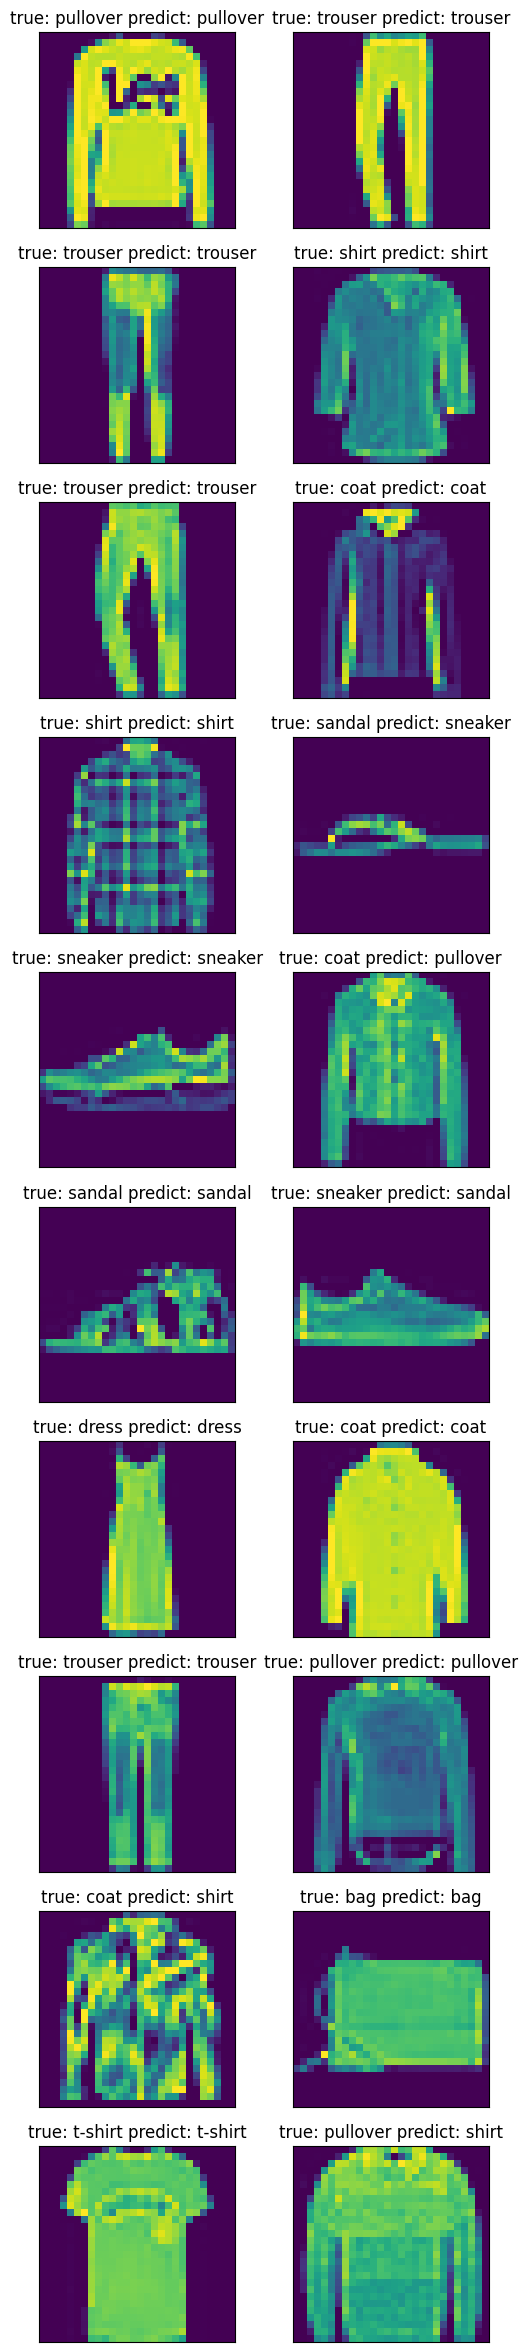

In [ ]:
x_test = x_test.detach().numpy()
show_images(x_test[1:31], 10, 2, titles=get_fashion_mnist_labels(y_test[1:31], yhat[1:31]), scale=3)